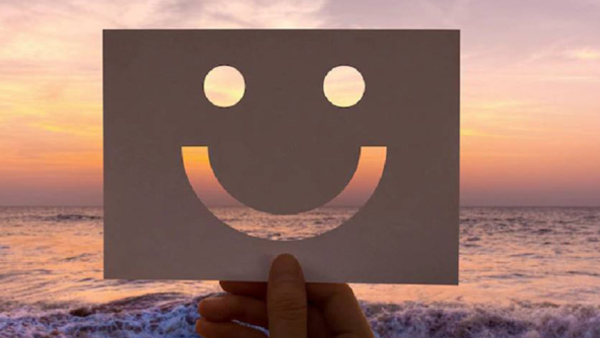

**Worlds happiness Index Prediction**

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import pandas as pd
data= pd.read_csv("HappiessIndex.csv")

In [7]:
data.head(5)

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [8]:
# Check for duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())

# Drop duplicate rows
data_cleaned = data.drop_duplicates()

Number of duplicate rows: 0


In [9]:
print(data.isnull().sum())


Overall rank                    0
Country or region               0
Year                            0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


Pre Processing of the data

In [10]:
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


In [11]:
# Step 5: Split Data
X = data[features]
y = data['Score']  # Target variable

In [12]:
from sklearn.preprocessing import scale

X_scaled = scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=['Score'])

In [13]:
# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)



LINEAR REGRESSION




In [14]:
# Step 6: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Step 7: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

In [16]:
# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [17]:
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 0.22502270098588795
R-squared: 0.7371366383685725


In [18]:
r2_score(y_test, y_pred)


0.7371366383685725

DecisionTreeRegressor

In [19]:
sample_data = {
    'GDP per capita': [3.203],
    'Social support': [0.350],
    'Healthy life expectancy': [0.517],
    'Freedom to make life choices': [0.361],
    'Generosity': [0.000],
    'Perceptions of corruption': [0.158]
}
X_sample = pd.DataFrame(sample_data)
y_pred = model.predict(X_sample)

# Display the predicted score
print("Predicted Score:")
print(y_pred)

Predicted Score:
[[1.42627068]]


In [20]:
import pickle

# Assuming 'model' is already trained

# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

LinearRegression()

Mean Squared Error: 0.27867247919754823


R^2 Score: 0.7371366383685724


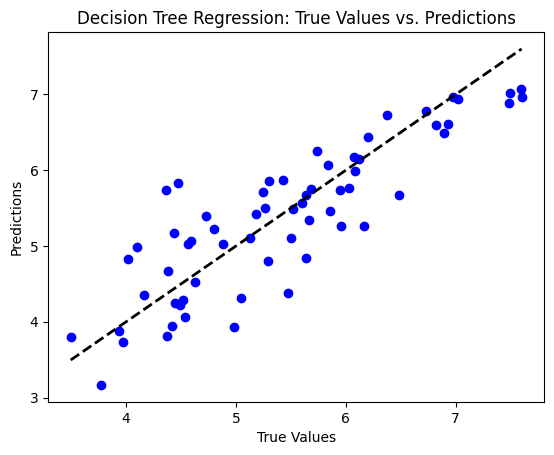

RandomForestRegressor

RandomForestRegressor(random_state=42)

Mean Squared Error: 0.2336250607444441


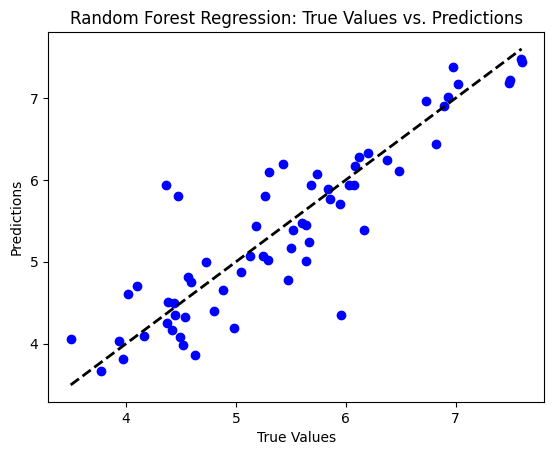